# Quantum Universe Splitter
## A Qiskit Implementation running on real IBM Quantum Hardware

The idea of a "universe splitter" is a compelling way to explore the principles of **quantum mechanics** using real-world quantum hardware. This concept leverages the core quantum phenomena of **superposition** and the dramatic implications of quantum measurement, particularly through the lens of the **Many-Worlds Interpretation (MWI)**.

---

### 1. Quantum Superposition

At the heart of the universe splitter is **superposition**. Unlike a classical bit, which must be either a definite **0** or a definite **1**, a quantum bit, or **qubit**, can exist in a combination of both states simultaneously.

Mathematically, a qubit state $|\psi\rangle$ is a linear combination of the basis states $|\mathbf{0}\rangle$ and $|\mathbf{1}\rangle$:

$$|\psi\rangle = \alpha|\mathbf{0}\rangle + \beta|\mathbf{1}\rangle$$

where $\alpha$ and $\beta$ are complex probability amplitudes, and the normalization condition dictates that the sum of the probabilities of finding the qubit in either state is 1: $|\alpha|^2 + |\beta|^2 = 1$.

* **The Universe Splitter Mechanism:** To create the 50/50 chance required for the split, the **Hadamard** gate ($H$) is applied to an initial $|\mathbf{0}\rangle$ state. This operation transforms the qubit into the perfectly balanced superposition state:
    $$\frac{1}{\sqrt{2}}|\mathbf{0}\rangle + \frac{1}{\sqrt{2}}|\mathbf{1}\rangle$$
    This is the moment the "potential" for the split is introduced. 

---

### 2. The Measurement Problem and Interpretations

When we **measure** a qubit in superposition, the wave function "collapses," forcing the qubit to choose a single, definite outcome ($\mathbf{0}$ or $\mathbf{1}$). This act of collapse is the fundamental challenge of quantum mechanics, leading to different interpretations:

* **The Copenhagen Interpretation:** This traditional view states that before measurement, the system genuinely exists in a probabilistic mix of states, and the act of measurement causes a **physical collapse** of the wave function into one definite state. The unobserved possibilities simply vanish.

* **The Many-Worlds Interpretation (MWI):** Proposed by Hugh Everett III, MWI takes the quantum mathematics literally. It posits that the wave function **never** truly collapses. Instead, when a measurement occurs, the entire universe—including the measuring apparatus and the observer's consciousness—**splits** (or branches) into separate, non-communicating parallel universes, one for each possible outcome.
    * **Consciousness and Forking:** In MWI, your consciousness (the version you identify with) experiences only one outcome (e.g., the $\mathbf{0}$ outcome). A near-identical clone of you, existing in the newly forked universe, experiences the alternative outcome (the $\mathbf{1}$ outcome). The "universe splitter" is thus the measurement process itself, causing the universe to branch into $N$ parallel realities for $N$ possible outcomes.

---

### 3. Implementation in Qiskit

Your universe splitter can be implemented with a simple Qiskit circuit: 

1.  **Initialize:** Create a single-qubit quantum circuit.
2.  **Superposition:** Apply the **Hadamard** gate ($H$) to the qubit.
3.  **Measurement:** Apply a measurement operation to transfer the quantum state's outcome into a classical bit.
4.  **Action:** Define a specific, measurable action (e.g., printing "Hello Universe 0" or "Hello Universe 1") conditioned on the classical bit's outcome ($\mathbf{0}$ or $\mathbf{1}$).

The key is that the chosen action (e.g., "Hello Universe 1") only takes place in the universe that corresponds to that specific measured outcome.

---

### WARNING: Simulator vs. Hardware

The "universe splitting" effect, as described by MWI, is only hypothesized to occur when interacting with a **real quantum system**.

* **Simulator:** If you run your Qiskit code on a local **simulator** (the default when no API key is provided), you are merely running classical code that *simulates* the probabilities of quantum behavior. **No parallel universe is created or split.**
* **Real IBM Quantum Hardware:** To potentially engage with the true quantum phenomena that MWI describes, you must execute the circuit on a **real IBM Quantum computer**. This requires an **API key** and the **instance CRN** of your quantum computing service. Only then are you using the physical hardware that may, according to MWI, initiate the universe-splitting event.

The universe splitter is configured to execute on the IBM Quantum Platform, utilizing the free service tier. Access credentials, including the required API Token and the specific Cloud Resource Name (CRN) for your instance, are available through the platform console at https://quantum.cloud.ibm.com

So first, let's install some packages...

In [ ]:
!pip install qiskit qiskit-ibm-runtime qiskit-aer matplotlib pylatexenc


In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator

Let's create a backend, either as simulator or connecting to a real IBM Quantum Computer

In [ ]:
use_simulator = True

if use_simulator:
    backend = AerSimulator()
else:
    # get your token and instance crn from https://quantum.cloud.ibm.com/
    token=''
    crn='crn:v1:bluemix:public:quantum-computing:us-east:a/2ed2b5149a5c4bb6b2d6e724670f3cb4:039447a3-d6a2-4235-86fc-deb47dede5cb::'
    service = QiskitRuntimeService(channel='ibm_quantum_platform',
            token=token,
            instance=crn)
    backend = service.least_busy(simulator=False, operational=True)

This is the actual Qiskit Quantum Circuit for the universe splitter. Apply the Hadamard operation to qubit zero to set it in superposition, then measure.

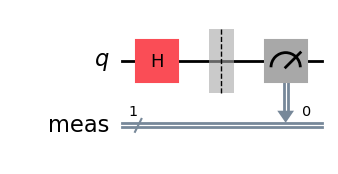

In [6]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all() 
qc.draw("mpl", fold=False, idle_wires=False)


Let's transpile the circuit according to the real hardware layout we obtain from the backend. Then we run the transpiled version and grab the result. Here we go.

In [ ]:
qc_transpiled = transpile(qc, backend=backend)
sampler = SamplerV2(mode=backend)
job = sampler.run([qc_transpiled], shots=1)
result = job.result()
meas = int(result[0].data.meas.array[0])
print("SplitUniverseId", meas)
print()
print()
print()
